In [35]:
from __future__ import print_function, division
from matplotlib.pyplot import plot, legend, xlabel, ylabel, rcParams, figure
import sympy
from sympy import Matrix, symbols, simplify, Function, expand_trig, Symbol
from sympy import cos, sin, exp, transpose, sqrt, pi
from sympy import diff
from sympy import latex, python, series
import sympy as sp
# init_vprinting(use_latex='mathjax', pretty_print=False)
#from sympy import init_printing
#init_printing(use_latex='mathjax', pretty_print=False)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
y= sp.symbols('y', real=True)
U, ui, D, sigma = sp.symbols('U, u_i, D, sigma', real=True, nonnegative=True)
kd, kg = sp.symbols('k_d, k_g', real=True, nonnegative=True)

In [37]:
def u_gauss(y, U, ui, D, sig, use_numpy=False, kd=0.5, kg=0.5):
    if use_numpy:
        du = - ui * np.exp(-1/2 * (y/sig)**2)
    else:
        du = - ui *    exp(-1/2 * (y/sig)**2)
    u = U + du
    gu = - du * y / sig**2 
    #import pdb; pdb.set_trace()
    KD = kd/U * abs(du)
    KG = kg*D/(2*U) * abs(gu)
    K = KD + KG
    K = (1/2*D*kg * abs(y) / sig**2 + kd)/U * abs(du)
    
    return u, du, gu, K, KD, KG

def kWAT1D(y, U, u, D, kd, kg, use_numpy=False):
    du = u-U
    if use_numpy:
        gu = np.gradient(du, y)
    else:
        gu = u.diff(y)        
    KD = kd/U * abs(du)
    KG = kg*D/(2*U) * abs(gu)
    K = KD + KG
    return K, KD, KG, du, gu
    

In [39]:
# --- Check symbolic calculations
u, du, gu, K, KD, KG = u_gauss(y, U, ui, D, sigma, kd=kd, kg=kg)
du2 = u-U
gu2 = u.diff(y)
gu-gu2
du-du2
K2, KD, KG, du, gu = kWAT1D(y, U, u, D, kd, kg)
K2
K2.simplify()
DK=K-K2
DK=DK.simplify()
DK

0

0

0.5*D*k_g*u_i*exp(-0.5*y**2/sigma**2)*Abs(y)/(U*sigma**2) + k_d*u_i*exp(-0.5*y**2/sigma**2)/U

u_i*(0.5*D*k_g*Abs(y) + k_d*sigma**2)*exp(-0.5*y**2/sigma**2)/(U*sigma**2)

0

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

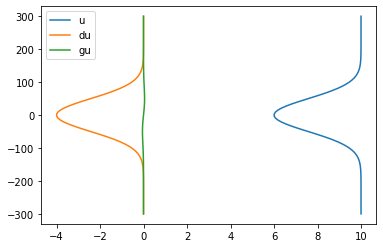

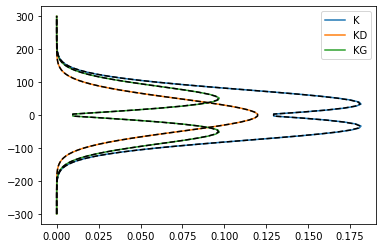

In [47]:
D_num = 100
U_num = 10
ui_num = 4
sig_num = 0.5*D_num
kd_num=0.3
kg_num=0.4
y_num = np.linspace(-3*D_num, 3*D_num, 100)

u, du, gu, K, KD, KG = u_gauss(y_num, U_num, ui_num, D_num, sig_num, use_numpy=True, kd=kd_num, kg=kg_num)
K2, KD2, KG2, du, gu = kWAT1D(y_num, U_num, u, D_num, kd_num, kg_num, use_numpy=True)

figure()
plot(u , y_num, label='u')
plot(du, y_num, label='du')
plot(gu, y_num, label='gu')
legend()
figure()
plot(K, y_num, label='K')
plot(KD, y_num, label='KD')
plot(KG, y_num, label='KG')
legend()
plot(K2, y_num, 'k--', label='K2')
plot(KD2, y_num, 'k--', label='KD2')
plot(KG2, y_num, 'k--', label='KG2')
